### Key Insights from Each Analysis
1. Sustainability Metrics:
Helps identify relationships between greenery, net area, and sunlight for energy efficiency.

2. Accessibility:
Highlights the impact of elevator availability on access distance.

3. Noise Pollution:
Explores how apartment geometry is affected by traffic and train noise.

4. Building Efficiency:
Investigates the compactness of buildings in relation to room count and net area, aiding in space optimization.

#### Each function is designed to handle subsets of the data to avoid performance bottlenecks.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
simulations = pd.read_csv(r'E:\Data Analytics\Swiss Apartment Models\simulations.csv')

In [6]:
simulations.columns

Index(['site_id', 'building_id', 'plan_id', 'floor_id', 'unit_id', 'area_id',
       'unit_usage', 'apartment_id', 'layout_compactness',
       'layout_is_navigable',
       ...
       'connectivity_balcony_distance_stddev',
       'connectivity_loggia_distance_max', 'connectivity_loggia_distance_mean',
       'connectivity_loggia_distance_median',
       'connectivity_loggia_distance_min', 'connectivity_loggia_distance_p20',
       'connectivity_loggia_distance_p80',
       'connectivity_loggia_distance_stddev',
       'layout_biggest_rectangle_length', 'layout_biggest_rectangle_width'],
      dtype='object', length=369)

In [7]:
simulations.head()

,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,apartment_id,layout_compactness,layout_is_navigable,...,connectivity_balcony_distance_stddev,connectivity_loggia_distance_max,connectivity_loggia_distance_mean,connectivity_loggia_distance_median,connectivity_loggia_distance_min,connectivity_loggia_distance_p20,connectivity_loggia_distance_p80,connectivity_loggia_distance_stddev,layout_biggest_rectangle_length,layout_biggest_rectangle_width
0,210,399,1054,1588,7300,619322,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.751449,True,...,1.099979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.453946,3.539037
1,210,399,1054,1588,7300,619310,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.768121,True,...,0.997100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156488,3.082780
2,210,399,1054,1588,7300,619311,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.701784,True,...,0.392496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357677,1.429785
3,210,399,1054,1588,7300,619303,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.777285,True,...,1.235303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156488,3.389554
4,210,399,1054,1588,7300,619315,RESIDENTIAL,3c3b1d6ca8b4b9092480b8c75f9eaa81,0.785398,True,...,0.426017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.685255,1.685255


### Sustainability Metrics Analysis
Evaluate relationships between layout_net_area, view_greenery_mean, and sunlight exposure metrics (sun_*).

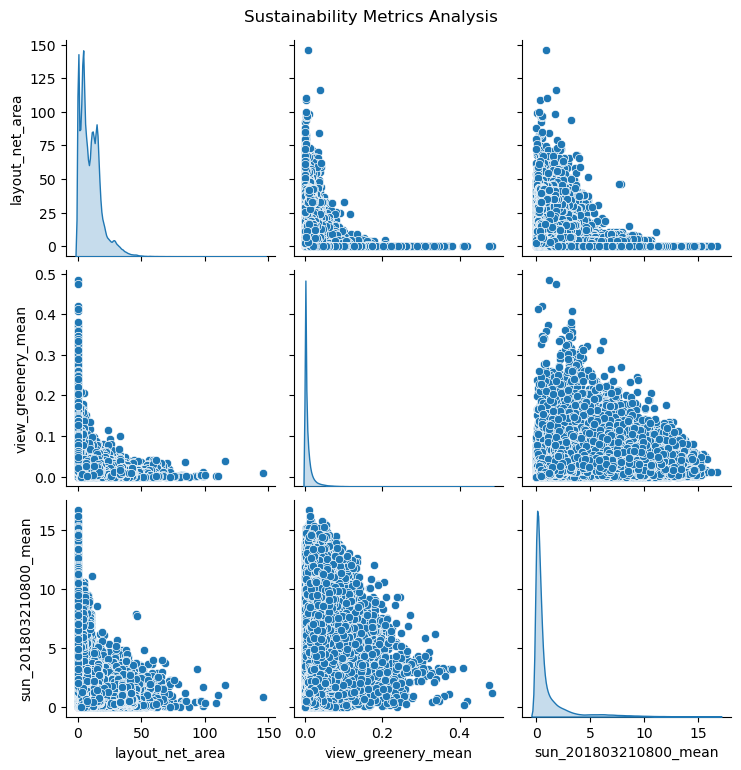

In [16]:
def sustainability_analysis(simulations):
    """
    Analyze sustainability metrics to evaluate energy efficiency.
    """
    # Select relevant columns
    features = simulations[['layout_net_area', 'view_greenery_mean', 'sun_201803210800_mean']]
    
    # Drop missing values
    features = features.dropna()
    
    # Pairplot to visualize relationships
    import seaborn as sns
    sns.pairplot(features, diag_kind='kde')
    plt.suptitle('Sustainability Metrics Analysis', y=1.02)
    plt.show()

# Example usage
sustainability_analysis(simulations)


### Accessibility Analysis
Assess accessibility using features like floor_has_elevator and connectivity_entrance_door_distance_mean.

Average Entrance Door Distance by Elevator Availability:
floor_has_elevator
False    23.837831
True     10.587152
Name: connectivity_entrance_door_distance_mean, dtype: float64


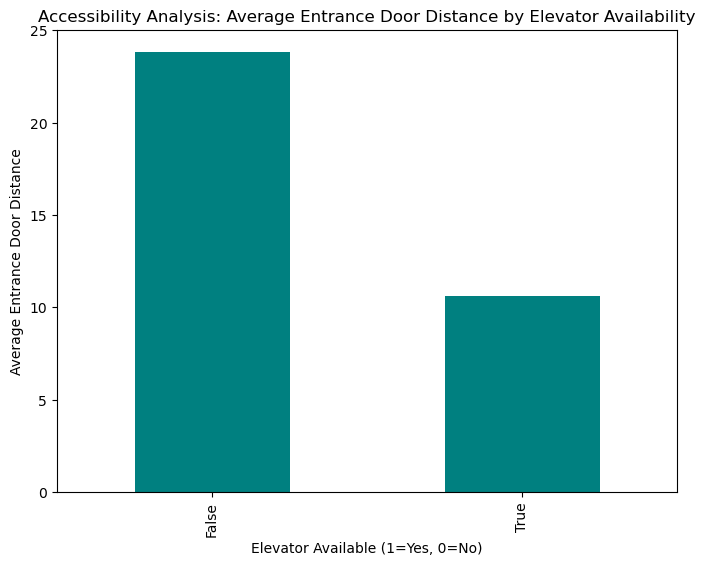

In [19]:
def accessibility_analysis(simulations):
    """
    Analyze accessibility metrics to understand ease of access.
    """
    # Group by elevator availability and compute average door distance
    access_summary = simulations.groupby('floor_has_elevator')['connectivity_entrance_door_distance_mean'].mean()
    print("Average Entrance Door Distance by Elevator Availability:")
    print(access_summary)
    
    # Visualization
    access_summary.plot(kind='bar', color='teal', figsize=(8, 6))
    plt.title('Accessibility Analysis: Average Entrance Door Distance by Elevator Availability')
    plt.xlabel('Elevator Available (1=Yes, 0=No)')
    plt.ylabel('Average Entrance Door Distance')
    plt.show()

# Example usage
accessibility_analysis(simulations)


### Noise Pollution Analysis
Explore noise pollution features (noise_traffic_day, noise_train_day) relative to apartment geometry.

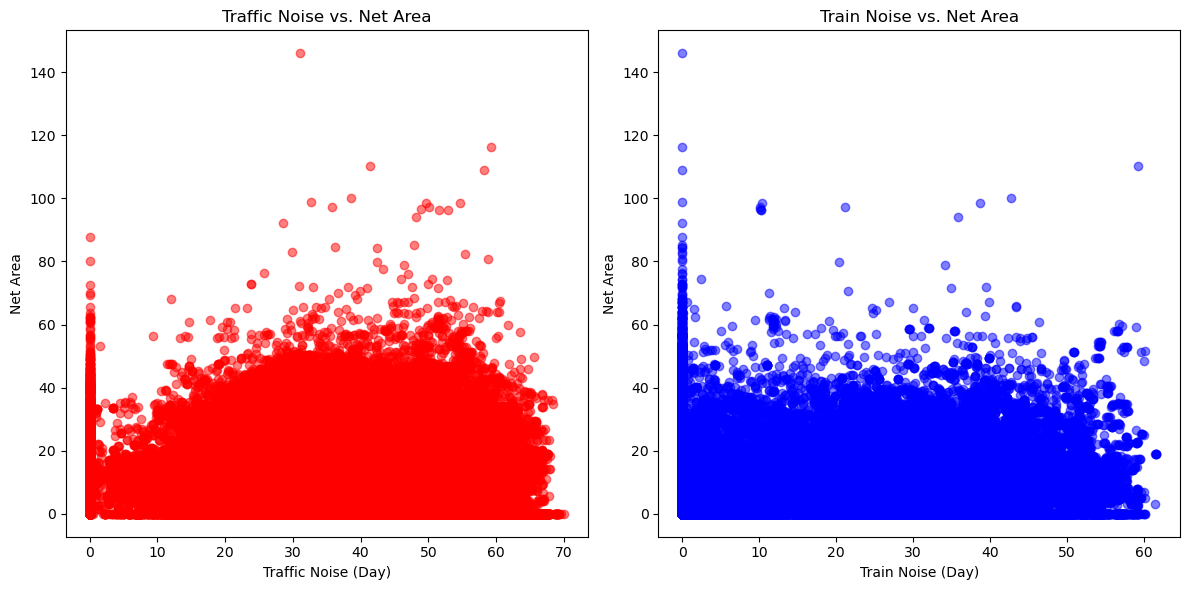

In [22]:
def noise_pollution_analysis(simulations):
    """
    Explore relationships between noise pollution and apartment geometry.
    """
    # Select relevant features
    noise_features = simulations[['noise_traffic_day', 'noise_train_day', 'layout_net_area']]
    
    # Drop missing values
    noise_features = noise_features.dropna()
    
    # Scatter plots
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(noise_features['noise_traffic_day'], noise_features['layout_net_area'], alpha=0.5, color='red')
    plt.title('Traffic Noise vs. Net Area')
    plt.xlabel('Traffic Noise (Day)')
    plt.ylabel('Net Area')
    
    plt.subplot(1, 2, 2)
    plt.scatter(noise_features['noise_train_day'], noise_features['layout_net_area'], alpha=0.5, color='blue')
    plt.title('Train Noise vs. Net Area')
    plt.xlabel('Train Noise (Day)')
    plt.ylabel('Net Area')
    
    plt.tight_layout()
    plt.show()

# Example usage
noise_pollution_analysis(simulations)


### Building Efficiency Analysis
Examine layout_compactness against layout_room_count and layout_area

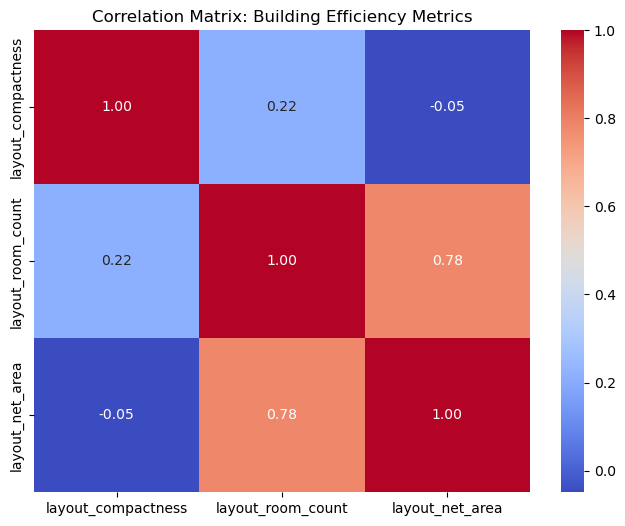

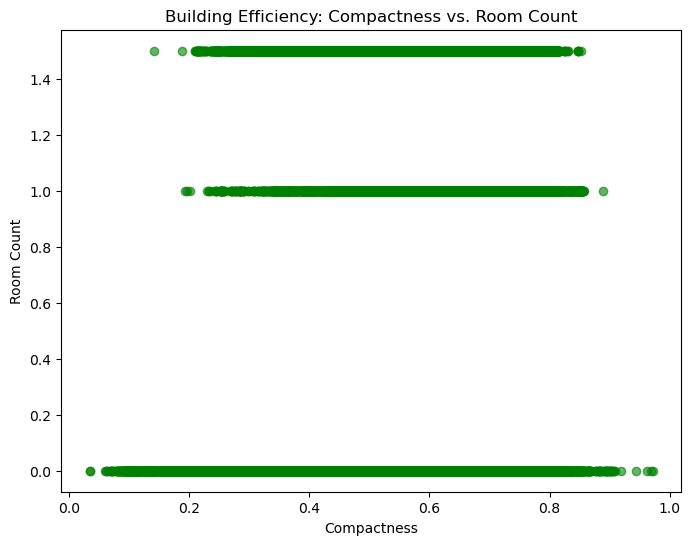

In [26]:
def building_efficiency_analysis(simulations):
    """
    Analyze building efficiency using compactness and layout metrics.
    """
    # Select relevant columns
    efficiency_features = simulations[['layout_compactness', 'layout_room_count', 'layout_net_area']]
    
    # Drop missing values
    efficiency_features = efficiency_features.dropna()
    
    # Heatmap of correlations
    import seaborn as sns
    corr_matrix = efficiency_features.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix: Building Efficiency Metrics')
    plt.show()
    
    # Scatter plot: Compactness vs. Room Count
    plt.figure(figsize=(8, 6))
    plt.scatter(efficiency_features['layout_compactness'], efficiency_features['layout_room_count'], alpha=0.6, color='green')
    plt.title('Building Efficiency: Compactness vs. Room Count')
    plt.xlabel('Compactness')
    plt.ylabel('Room Count')
    plt.show()

# Example usage
building_efficiency_analysis(simulations)
